In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

### Fitting Tiago Drawings

Tiago has proposed a model on which the depth and width of the channel is not constant along all the curve. 
The main assumption here is that this two properties are dependently strictly of the terrain slope.

We can see in the plot that width x slope tends towards a exponencial dependency and depth x slope tends to a linear dependency.

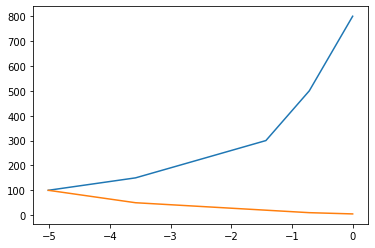

In [72]:
slope = np.tan(np.linspace(-5.0, 0.0, 8) * np.pi / 180)
width = np.array([100.0, 125.0, 150.0, 200.0, 250.0, 300.0, 500.0, 800.0])
depth = np.array([100.0, 75.0, 50.0, 40.0, 30.0, 20.0, 10.0, 5.0])

plt.plot(slope * 180 / np.pi, width, slope * 180 / np.pi, depth)

### width constants
692.4154350661511 -45.231656699536124 104.60941780103624
### depth constants
-1038.6756354535573 -4.136666533884889


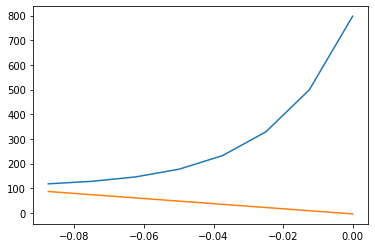

In [57]:
W2, W1, W0 = curve_fit(lambda x, a, b, c: a * np.exp(-b * x) + c, slope, width)[0]
D1, D0 = curve_fit(lambda x, a, b: a * x + b, slope, depth)[0]

fitted_width = W2 * np.exp(- W1 * slope) + W0
fitted_depth = D1 * slope + D0

print('### width constants')
print(W2, W1, W0)

print('### depth constants')
print(D1, D0)
plt.plot(slope, fitted_width, slope, fitted_depth)


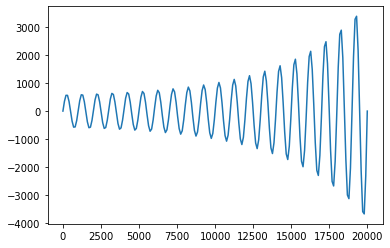

In [56]:
L = 20000                     # channel length (m)
W = 200.0                     # constant channel width (m)
D = 12.0                      # constant channel depth (m)
ds = 100.0                    # sampling distance along centerline

x = np.linspace(0, L, int(L/ds))
z = np.tan(5.0 * np.pi / 180) * (L/2  + x * ( x / (2*L) - 1))
dz = np.gradient(z) / ds

w = W2 * np.exp(- W1 * dz) + W0
d = D1 * dz + D0

y = 5 * w  * np.sin(x * np.pi / (5*ds))

plt.plot(x, y)

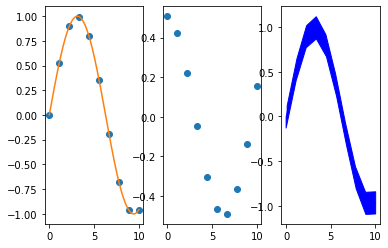

In [71]:
from scipy.interpolate import splev, splrep, BSpline

w = 0.1

x = np.linspace(0, 10, 10)
y = np.sin(x/2)

dx = np.gradient(x)
dy = np.gradient(y)

dx2 = np.gradient(dx)
dy2 = np.gradient(dy)

R = np.sqrt(dx2 ** 2 + dy2 ** 2) / np.abs(dx*dy2 - dy*dx2)

xo = w * (dy / R)
yo = w * (dx / R)

#nv = np.hstack((dy, -dx))

t, c, _ = splrep(x, y, k=3)

x2 = np.linspace(0, 10, 200)
y2 = splev(x2, (t, c, 3), der = 0)
dy2 = splev(x, (t, c, 3), der = 1)


fig, [ax1, ax2, ax3] = plt.subplots(1, 3)

ax1.plot(x, y, 'o', x2, y2)
ax2.plot(x, dy2, 'o')
ax3.fill_between(x + xo, y + yo, y, color='blue')
ax3.fill_between(x - xo, y - yo, y, color='blue')
#ax3.plot(x, y, 'o', x_left_border, y_left_border,'o', x_right_border, y_right_border, 'o')
plt.show()